<a href="https://www.kaggle.com/code/abhilashdas/fast-food-yum-yum-2-me?scriptVersionId=141447249" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


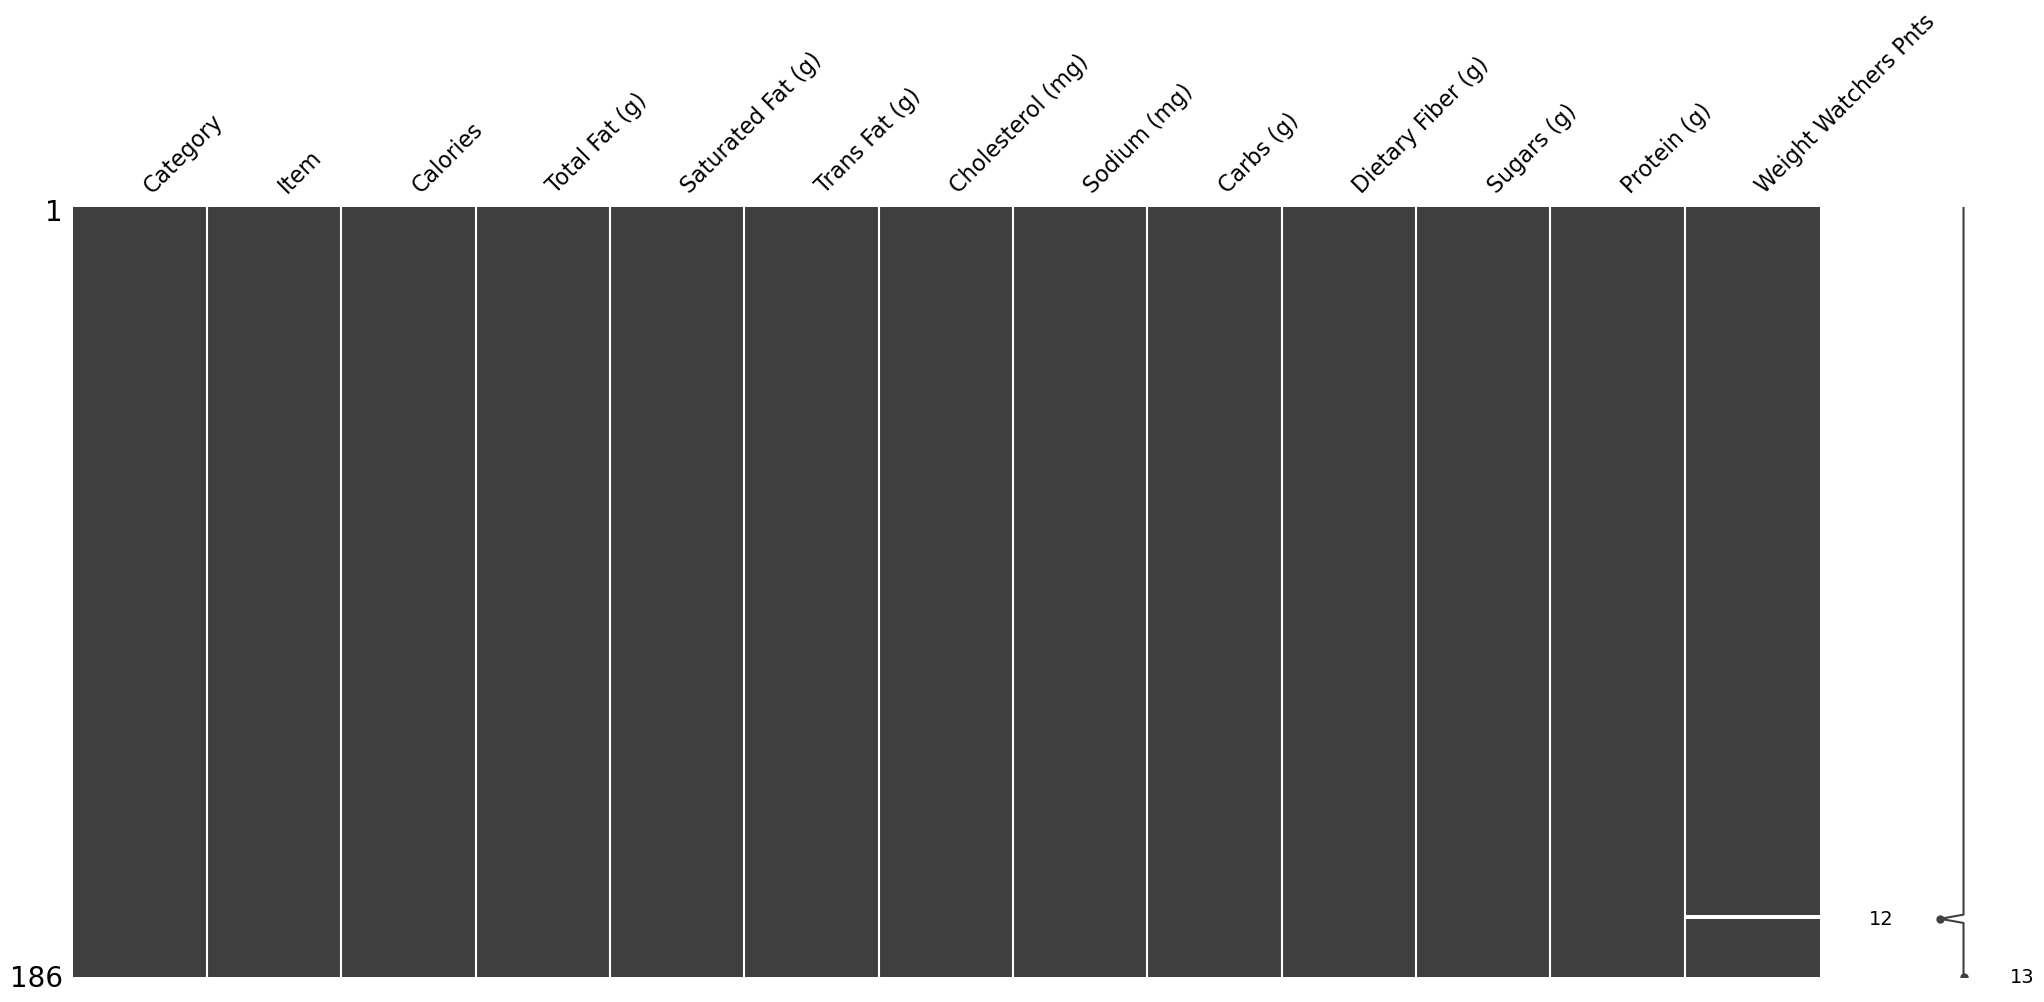

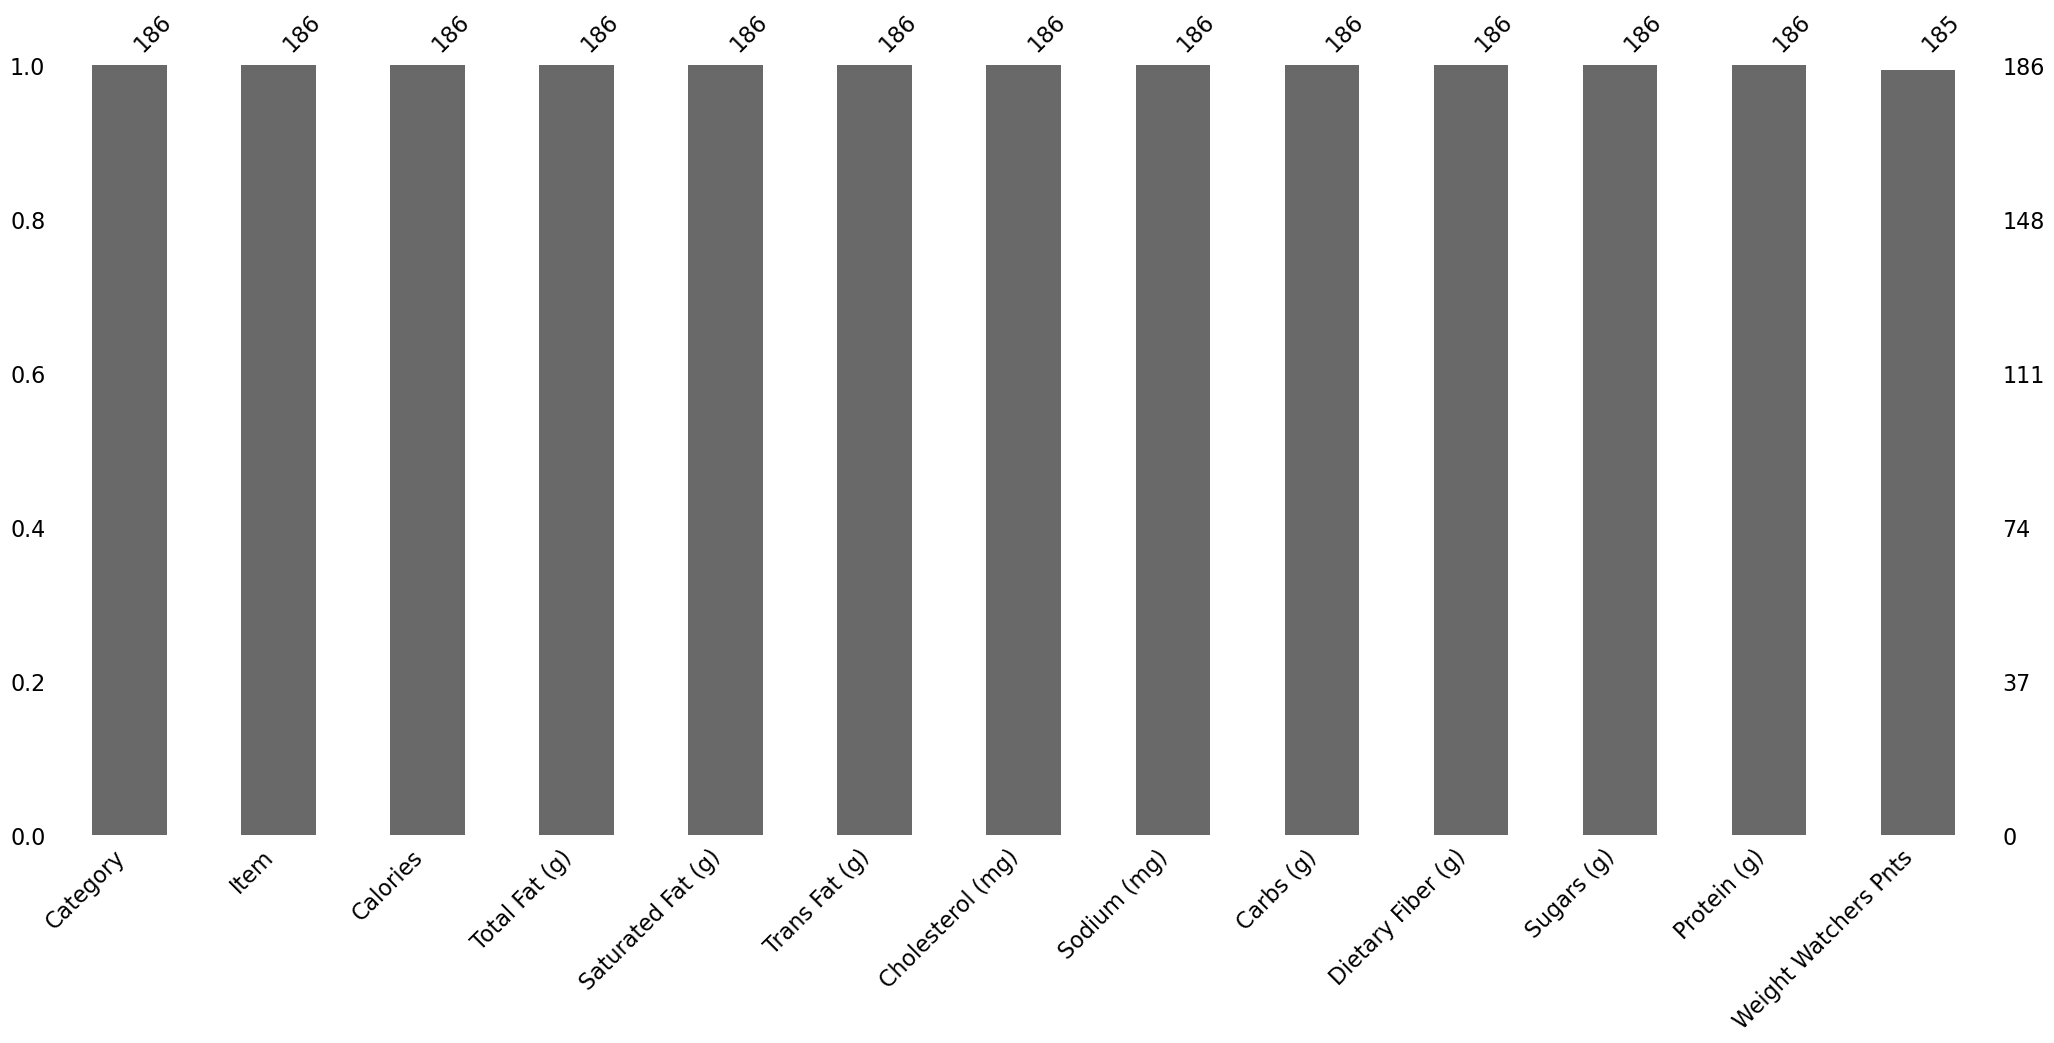

In [2]:
df = pd.read_csv('/kaggle/input/subway-nutrition/SubwayMenuNutrition.csv')
msno.matrix(df)
plt.show()
msno.bar(df)
plt.show()

<Axes: >

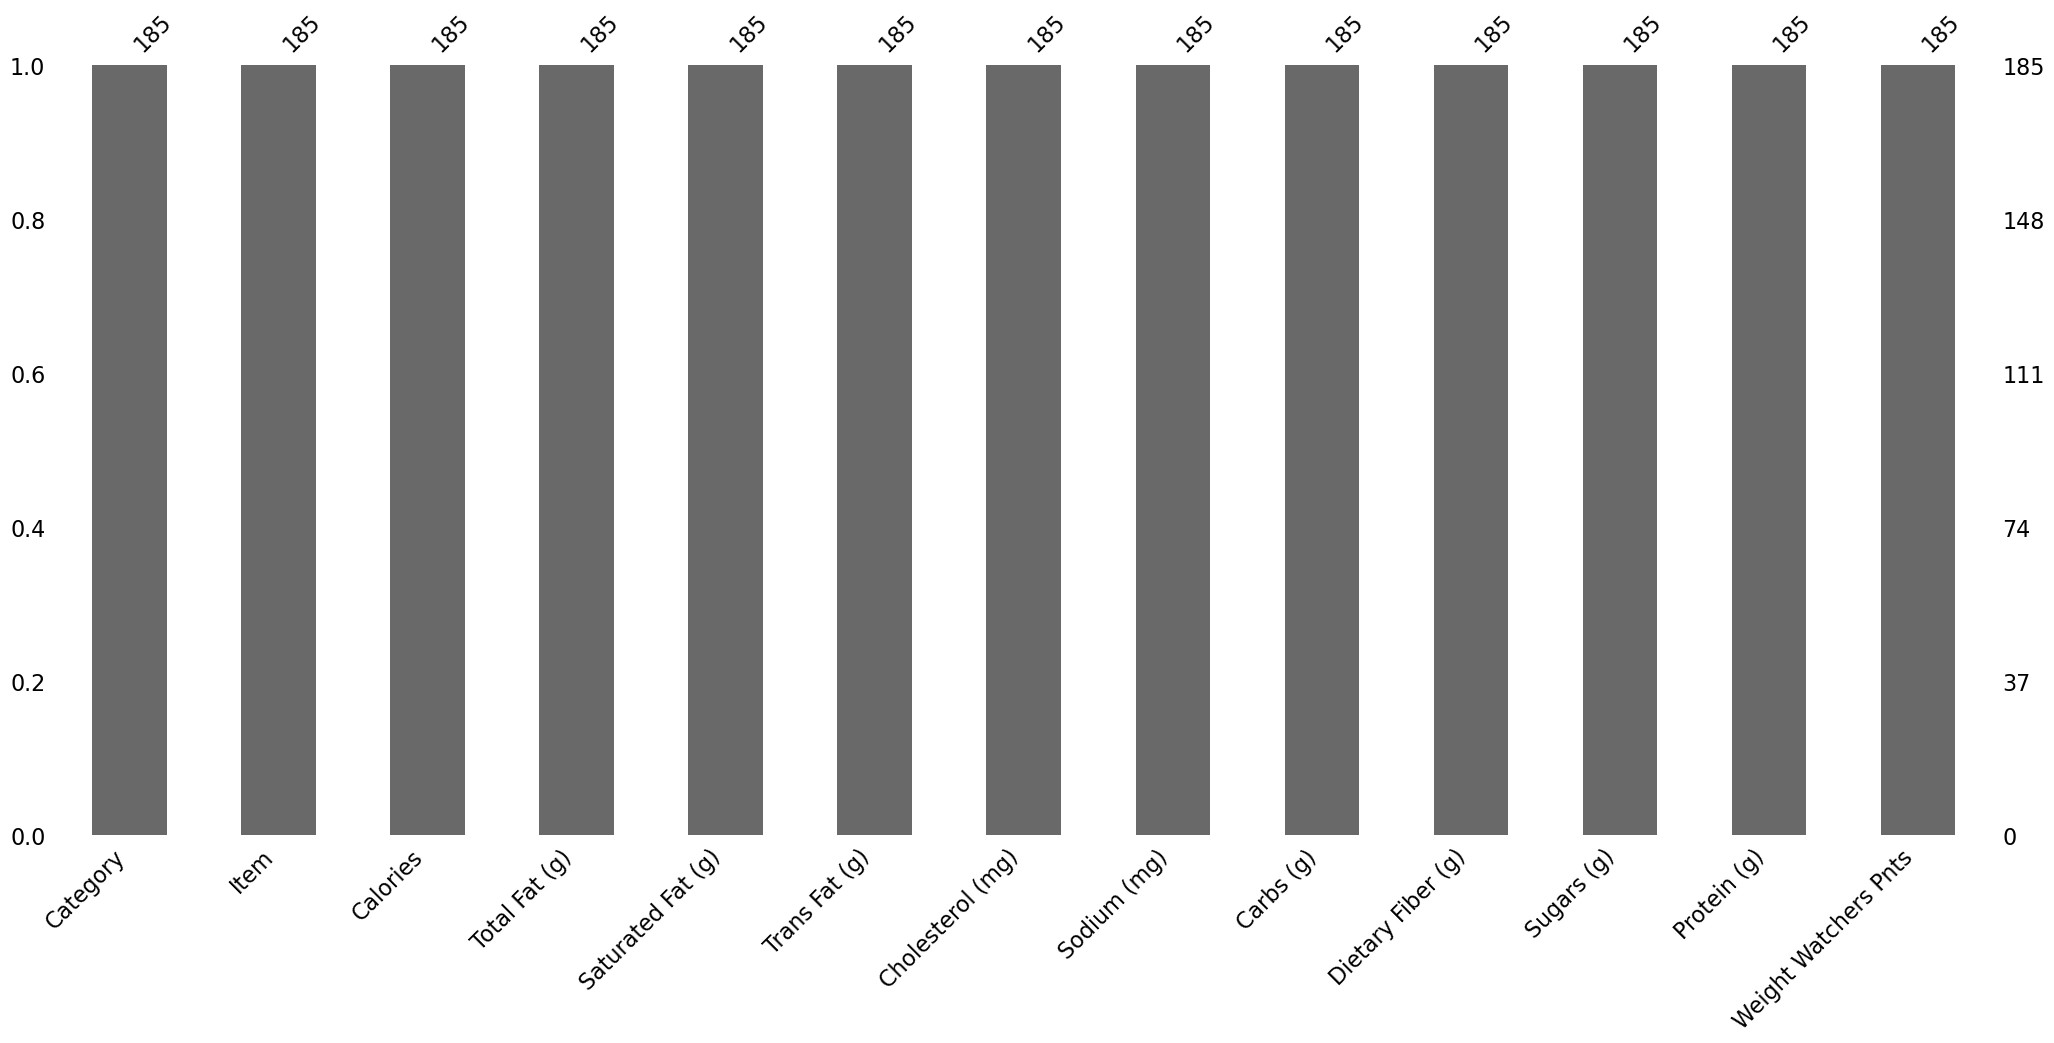

In [3]:
df.dropna(inplace=True)
msno.bar(df)

In [4]:
df.head()

,Category,Item,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
0,Sandwiches,BBQ Chicken,330,4.0,1.0,0.0,50,860,50,2,16,24,323.0
1,Sandwiches,BBQ Rib,580,31.0,10.0,0.0,60,1260,54,3,18,21,587.0
2,Sandwiches,Black Forest Ham,260,4.0,1.5,0.0,30,720,42,5,8,18,251.5
3,Sandwiches,Buffalo Chicken,360,12.0,2.0,0.0,55,7710,39,3,5,24,343.0
4,Sandwiches,Chicken & Bacon Ranch,530,26.0,10.0,0.5,100,1100,41,3,6,36,510.0


In [5]:
df.isnull().sum()
# A really nice dataset

Category                0
Item                    0
Calories                0
Total Fat (g)           0
Saturated Fat (g)       0
Trans Fat (g)           0
Cholesterol (mg)        0
Sodium (mg)             0
Carbs (g)               0
Dietary Fiber (g)       0
Sugars (g)              0
Protein (g)             0
Weight Watchers Pnts    0
dtype: int64

In [6]:
df.columns

Index(['Category', 'Item', 'Calories', 'Total Fat (g)', 'Saturated Fat (g)',
       'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Carbs (g)',
       'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)',
       'Weight Watchers Pnts'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              185 non-null    object 
 1   Item                  185 non-null    object 
 2   Calories              185 non-null    int64  
 3   Total Fat (g)         185 non-null    float64
 4   Saturated Fat (g)     185 non-null    float64
 5   Trans Fat (g)         185 non-null    float64
 6   Cholesterol (mg)      185 non-null    int64  
 7   Sodium (mg)           185 non-null    int64  
 8   Carbs (g)             185 non-null    int64  
 9   Dietary Fiber (g)     185 non-null    int64  
 10  Sugars (g)            185 non-null    int64  
 11  Protein (g)           185 non-null    int64  
 12  Weight Watchers Pnts  185 non-null    float64
dtypes: float64(4), int64(7), object(2)
memory usage: 20.2+ KB


In [8]:
numeric_clmns = df.dtypes[df.dtypes != "object"].index
print('\n\nNumeric colmns: ', list(numeric_clmns))
print("\n*******************")
print("*********************************")
print("*******************\n")

object_colmns = df.dtypes[df.dtypes == "object"].index
print('Object colmns: ', list(object_colmns), '\n')




Numeric colmns:  ['Calories', 'Total Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Carbs (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)', 'Weight Watchers Pnts']

*******************
*********************************
*******************

Object colmns:  ['Category', 'Item'] 



# 🫠 Food Distribution 🥝🥝

In [9]:
figp = px.sunburst(df, path=['Category', 'Item'], values='Calories', color='Category')
figp.update_layout(width = 1000, 
                  height = 900,
                  title = 'Distribution of Subway Food',
                  title_x=0.5)
figp.show()

# 🍲 Let's make some Histograms to showcase the average nutritional values of different kinds of foods 🦐

In [10]:
mean_table = df.groupby('Category').mean()
mean_table.reset_index(inplace=True,allow_duplicates=False)
mean_table

,Category,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
0,Bowls,391.600000,23.040000,8.040000,0.480000,99.200000,1894.400000,15.240000,3.840000,7.240000,32.600000,374.280000
1,Bread & Toppings,88.020833,3.208333,0.989583,0.000000,4.166667,205.729167,12.291667,0.750000,1.291667,3.041667,87.260417
2,Breakfast,430.000000,17.250000,5.625000,0.125000,185.000000,1152.500000,47.000000,4.000000,4.000000,24.000000,415.625000
3,Drinks,77.727273,0.181818,0.090909,0.000000,0.909091,50.000000,19.454545,0.000000,18.545455,0.909091,95.454545
4,Extras,120.000000,6.333333,2.500000,0.000000,15.000000,201.666667,13.000000,0.000000,9.000000,3.333333,128.166667
5,Panini,600.000000,25.333333,11.000000,0.166667,71.666667,943.333333,61.000000,3.000000,5.000000,29.666667,586.333333
6,Salads,280.000000,15.326087,4.717391,0.130435,60.869565,1162.391304,16.000000,5.260870,8.000000,21.913043,270.804348
7,Sandwiches,400.238095,16.738095,5.630952,0.190476,54.404762,1152.619048,40.571429,3.285714,6.571429,23.190476,389.250000
8,Wraps,649.230769,28.615385,9.596154,0.192308,84.230769,1925.769231,63.500000,4.346154,6.384615,35.769231,629.442308


In [11]:
# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,6))
# for i in range(len(k.columns)):
#     print(i)
#     sns.histplot(data=mean_table, x='Category', y='Calories', logx=False, ax=axes[1])


In [12]:

for i in range(1, len(mean_table.columns)):
    
    title_ = mean_table.columns[i] + ' Vs. Different Categories of Food ' 
    
    fig1 = px.bar(mean_table, x=mean_table.columns[i], y='Category', orientation='h', text='Category',
              color='Category', color_continuous_scale='Viridis', width=900, height=400, title=title_) 
    fig1.update_layout(title={"x":0.5})
    fig1.show()

# * Conclusion:
 * The way I see it, wraps should be delicious(I never had one)  🫶💜🫶
 * Drinks have no protein, less than those silly kitties on instagram  😾
 * Honestly dumplings are the superior food  🤌🤌 🥟
 
 

In [13]:
# from plotly.subplots import make_subplots
# fig3 = make_subplots(rows=4, cols=3)
# fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]), row=1, col=1)


In [14]:


# # # k.plot()
# for i in range(len(k.columns)):
#     print(i)
#     sns.regplot(data=df, x='subscribers', y='video views', logx=False, ax=axes[0], hue=)


In [15]:
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 5))

# sns.regplot(data=df, x='subscribers', y='video views', logx=False, ax=axes[0], hue=)

# sns.regplot(data=df, x='video views', y='highest_monthly_earnings', logx=False,  ax=axes[1])

# sns.regplot(data=df, x='highest_monthly_earnings', y='subscribers', logx=False,  ax=axes[2])


In [16]:
# summary_stats = df.groupby(["Category"]).agg(
#     sum_length = ("length_num", "mean"),
#     mean_gain = ("gain", "mean")
# ).reset_index()